# ML-dSGP4

This tutorial introduces a hybrid model that uses neural networks to correct the input and outputs of dSGP4, to better match the precision of high-precision numerical integrators and/or simulated data.

For more details on what this entails and some discussion on the obtained results on <2,000 Starlink satellites, check out our publication: [Acciarini, Giacomo, Atılım Güneş Baydin, and Dario Izzo. "*Closing the Gap Between SGP4 and High-Precision Propagation via Differentiable Programming*" (2024) Vol. 226(1), pages: 694-701](https://doi.org/10.1016/j.actaastro.2024.10.063). 

The objective is to provide a way to improve the dSGP4 accuracy, when higher-precision simulated or observed data is available. This could also be a powerful tool for operators.

For this, we leverage the differentiablity of dSGP4 to backpropagate through inputs and outputs of the model.

![ML-dSGP4](../_static/dsgp4_backprop_diagram.png)


## Imports

In [ ]:
import dsgp4
import torch
import matplotlib.pyplot as plt

## Load TLEs and ML-dSGP4 pre-trained model:

In [ ]:
#we load some TLEs, as usual:
tles = dsgp4.tle.load("example.tle")

In [ ]:
#we load a pre-trained ML-dSGP4 model:
ml_dsgp4=dsgp4.mldsgp4(hidden_size=35)
ml_dsgp4.load_model(path='mldsgp4_example_model.pth',device='cpu')

> **💡 Note:** the output is normalized, and the normalization constant can be defined through `normalization_R` and `normalization_V` argumnets in `dsgp4.mldsgp4`, if not defined, default will be used.


## Prepare data

In [ ]:
#we now create a batch of TLE to later propagate it
tles_=[]
for tle in tles:
    tles_+=[tle]*10000
tsinces = torch.cat([torch.linspace(0,24*60,10000)]*len(tles))

## Batch TLE Propagation with ML-dSGP4

In [ ]:
#we use torch.no_grad() to avoid keeping track of the derivatives:
with torch.no_grad():    
    states_normalized_out=ml_dsgp4(tles_,tsinces)
states_normalized_out=states_normalized_out.detach().clone().numpy()

In [ ]:
#if we want to unnormalize:
position=states_normalized_out[:,:3]*ml_dsgp4.normalization_R
velocity=states_normalized_out[:,3:]*ml_dsgp4.normalization_V

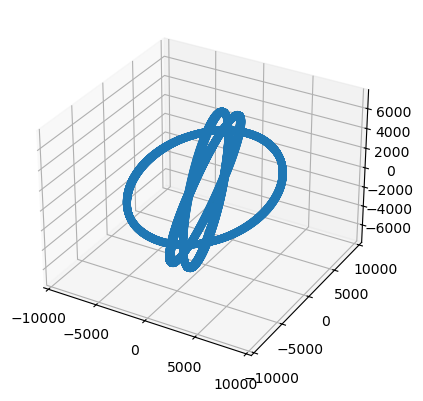

In [ ]:
#let's plot it:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(position[:,0], position[:,1], position[:,2])
ax.axis('equal');

## Single TLE Propagation with ML-dSGP4

In [ ]:
#we use torch.no_grad() to avoid keeping track of the derivatives:
with torch.no_grad():    
    state_normalized_out=ml_dsgp4(tles_[0],tsinces)
state_normalized_out=state_normalized_out.detach().clone().numpy()

In [ ]:
#if we want to unnormalize:
position=state_normalized_out[:,:3]*ml_dsgp4.normalization_R
velocity=state_normalized_out[:,3:]*ml_dsgp4.normalization_V

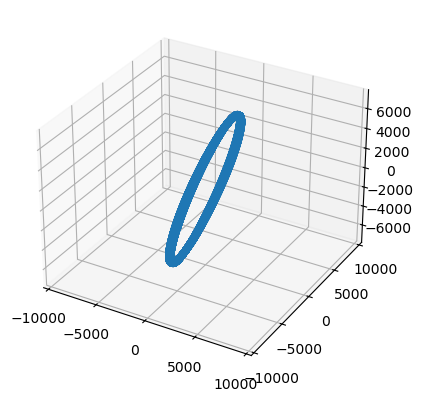

In [ ]:
#let's plot it:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(position[:,0], position[:,1], position[:,2])
ax.axis('equal');